<a href="https://colab.research.google.com/github/ambideXtrous9/Machine-Learning-Assignments/blob/main/214161006_214161011_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import f1_score
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn

In [ ]:
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning)

# Q1. Classification of Normal and Shouted Speech using MFCC features

In [ ]:
df_train = pd.read_csv('Train_file.csv', names=[i for i in range(61)])
X_train = df_train.drop(columns=[60]).to_numpy()
X_train = np.column_stack((np.ones((X_train.shape[0],1)), X_train))
y_train = df_train[60].to_numpy().reshape(-1,1)
X_train.shape

(86060, 61)

In [ ]:
df_test = pd.read_csv('Test_file.csv', names=[i for i in range(61)])
X_test = df_test.drop(columns=[60]).to_numpy()
X_test = np.column_stack((np.ones((X_test.shape[0],1)), X_test))
y_test = df_test[60].to_numpy().reshape(-1,1)
X_test.shape

(21516, 61)

In [ ]:
def mysigmoid(z):
    return np.reciprocal(1 + (np.e**(-z)))

def myloss(y_true, y_pred):
    return -1*np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

def myF1score(y_true, y_pred):
    
    #compute precision
    P = np.sum((y_pred==y_true) & (y_true==1))/np.sum(y_pred==1)
    
    #compute recall
    R = np.sum((y_pred==y_true) & (y_true==1))/np.sum(y_true==1)
    
    #compute F1 score
    F1 = (2*P*R)/(P+R)
    
    return F1

In [ ]:
def train_perceptron(X, y, epochs = 10, batch_size=100, lr=1):
    
    #set no of samples - m
    m = X.shape[0]
    
    #set dimension of each input - n (including bias)
    n = X.shape[1]
    
    #initialize weight matrix & bias scalar - W
    W = np.random.uniform(low=0.1, high=1,size=(n,1)) #set low=0.1 so that it doesnt initialize 0
    
    #initialize array to store training losses for each epoch
    train_losses = []
    
    #for each epoch
    for e in range(epochs):
        print("---Epoch {}---".format(e+1))
        
        #for each batch - predict y
        for i in range(0, m, batch_size):
            #set batches
            X_batch = X[i:min(i+batch_size, m),:]
            y_batch = y[i:min(i+batch_size, m),:]

            #predict y using linear transformation
            y_pred = np.matmul(X_batch,W)
            #apply sigmoid
            y_pred = mysigmoid(y_pred)

            #compute loss - binary cross-entropy
            loss = myloss(y_batch, y_pred)

            #do gradient descent on this mini-batch
            W = W - (lr/y_batch.shape[0])*np.matmul(X_batch.T,y_pred-y_batch)
        
        #compute net loss for this epoch
        net_loss = myloss(y, mysigmoid(np.matmul(X,W)))
        train_losses.append(net_loss)
        print("Training Loss: {}\n".format(net_loss))
    
    #plot the train losses
    plt.figure(figsize=(7,7))
    plt.plot(range(1, epochs+1), train_losses)
    plt.title('Training Loss')
    plt.xlabel('epochs')
    plt.ylabel('train loss')
    plt.show()
    
    return W, train_losses

In [ ]:
def predict_perceptron(X, y, W):
    
    #predict y using learned weights
    y_pred = mysigmoid(np.matmul(X,W))
    
    #classify y_pred using a threshold
    y_pred = (y_pred>=0.5).astype(int)
    
    #compute F1 score for class 0
    print("F1-score for class 0: {:.2f}".format(myF1score((~y[y==0].astype(bool)).astype(int), (~y_pred[y==0].astype(bool)).astype(int))))
    
    #compute F1 score for class 1
    print("F1-score for class 1: {:.2f}".format(myF1score(y[y==1], y_pred[y==1])))
    
    #compute F1 score overall
    print("F1-score overall: {:.2f}".format(myF1score(y, y_pred)))
    
    #compute accuracy score
    print("Accuracy score: {:.2f}%".format(100*np.sum(y_pred==y)/y.shape[0]))
    

---Epoch 1---
Training Loss: 0.22812495772009922

---Epoch 2---
Training Loss: 0.21144631088557636

---Epoch 3---
Training Loss: 0.20156299968848984

---Epoch 4---
Training Loss: 0.19507264655150217

---Epoch 5---
Training Loss: 0.1905428653133742

---Epoch 6---
Training Loss: 0.1872326233380853

---Epoch 7---
Training Loss: 0.18472368861986133

---Epoch 8---
Training Loss: 0.18276391091658406

---Epoch 9---
Training Loss: 0.18119335350924515

---Epoch 10---
Training Loss: 0.17990647973584337

---Epoch 11---
Training Loss: 0.17883140191033778

---Epoch 12---
Training Loss: 0.1779178402474972

---Epoch 13---
Training Loss: 0.17712982102222855

---Epoch 14---
Training Loss: 0.17644108873056694

---Epoch 15---
Training Loss: 0.1758321373500001

---Epoch 16---
Training Loss: 0.17528824044995073

---Epoch 17---
Training Loss: 0.17479811520822774

---Epoch 18---
Training Loss: 0.17435299869878804

---Epoch 19---
Training Loss: 0.173945998144183

---Epoch 20---
Training Loss: 0.17357162674852

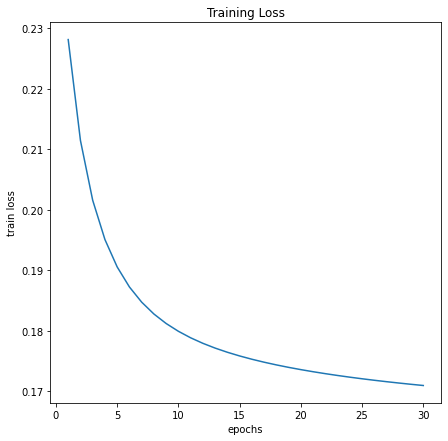

In [ ]:
W, _ = train_perceptron(X_train, y_train, epochs=30, lr=0.1)

In [ ]:
predict_perceptron(X_test, y_test, W)

F1-score for class 0: 0.97
F1-score for class 1: 0.96
F1-score overall: 0.93
Accuracy score: 92.96%


# Q2. Classification on MiniBoonE Dataset

In [ ]:
electron = 36499 
muon = 93565

In [ ]:
df = np.loadtxt('MiniBooNE_PID.txt')

In [ ]:
df = pd.DataFrame(df)
df.columns = ['X' + str(x) for x in range(50) ]

In [ ]:
df['Y'] = 1
df.iloc[0:electron,50] = 0

In [ ]:
df['Y'].value_counts()

1    93565
0    36499
Name: Y, dtype: int64

In [ ]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,Y
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,0
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,0
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,0
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,0
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,0


In [ ]:
electron_signal = df.iloc[0:36499,:]
muon_background = df.iloc[36499:,:]

In [ ]:
electron_signal_test = electron_signal.iloc[0:11000,:]
electron_signal_train = electron_signal.iloc[11000:,:]

In [ ]:
muon_background_test = muon_background.iloc[0:11000,:]
muon_background_train = muon_background.iloc[11000:,:]

In [ ]:
print(muon_background_train.shape)
print(electron_signal_train.shape)
print(muon_background_test.shape)
print(electron_signal_test.shape)
print(df.shape)
print(muon_background_train.shape[0]+electron_signal_train.shape[0]+muon_background_test.shape[0]+electron_signal_test.shape[0])

(82565, 51)
(25499, 51)
(11000, 51)
(11000, 51)
(130064, 51)
130064


In [ ]:
X1 = pd.concat([electron_signal_train,muon_background_train])
X2 = pd.concat([electron_signal_test,muon_background_test])
print(X1.shape)
print(X2.shape)

(108064, 51)
(22000, 51)


In [ ]:
X1 = X1.sample(frac=1).reset_index(drop=True)
X2 = X2.sample(frac=1).reset_index(drop=True)

In [ ]:
X_train = X1.iloc[:,:-1]
Y_train = X1.iloc[:,-1]
print(X_train.shape)
print(Y_train.shape)
X_test = X2.iloc[:,:-1]
Y_test = X2.iloc[:,-1]
print(X_test.shape)
print(Y_test.shape)

(108064, 50)
(108064,)
(22000, 50)
(22000,)


In [ ]:
input_scaler = StandardScaler()
xtrr = np.array(X_train)
ytr = np.array(Y_train)
xtss = np.array(X_test)
yts = np.array(Y_test)
xtr = input_scaler.fit_transform(xtrr)
xts = input_scaler.transform(xtss)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hl1 = nn.Linear(in_features=50, out_features=1)
        self.sig1 = nn.Sigmoid()
        
    def forward(self, x):
        x = self.hl1(x)
        x = self.sig1(x)
        return x.squeeze()

In [ ]:
def train(model, x, y, loss_fn, optimizer, batch_size=10):
    model.train()
    x, y = torch.Tensor(x).to(device), torch.Tensor(y).to(device)
    net_loss = 0
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        net_loss = net_loss + loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return net_loss

In [ ]:
def test(model, xts, yts):
    model.eval()
    with torch.no_grad():
        xt = torch.Tensor(xts).to(device)
        yt = torch.Tensor(yts).to(device)
        pred = model(xt)
        yhat = torch.zeros(pred.shape).to(device)
        yhat[pred > 0.5] = 1
        f1_sc = f1_score(yt.cpu().data, yhat.cpu(),average=None)
        print("\tF-1 Score : {} % ".format(f1_sc))
        acc = sum(yhat==yt)*100/len(yt)
        print("\tTest Accuracy : {} % ".format(acc))
        return acc,f1_sc

In [ ]:
epoch = 100
bs = 64

In [ ]:
model = SimpleClassifier().to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())
batch_size = bs
epochs = epoch

LOSS = []
ACC = []
F1SC = []

for i in range(epochs):
    print("--- Epoch {} ---".format(i+1))
    epoch_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    LOSS.append(epoch_loss)
    print("\tBCE Loss (Training) : {} ".format(epoch_loss))
    accr,f1_sc = test(model, xts, yts)
    ACC.append(accr)
    F1SC.append(f1_sc)

--- Epoch 1 ---
	BCE Loss (Training) : 760.452807366848 
	F-1 Score : [0.68362883 0.79360072] % 
	Test Accuracy : 75.01818084716797 % 
--- Epoch 2 ---
	BCE Loss (Training) : 576.6193342506886 
	F-1 Score : [0.68958393 0.79646284] % 
	Test Accuracy : 75.41363525390625 % 
--- Epoch 3 ---
	BCE Loss (Training) : 557.3360737264156 
	F-1 Score : [0.69930548 0.80018158] % 
	Test Accuracy : 75.99090576171875 % 
--- Epoch 4 ---
	BCE Loss (Training) : 549.9966596066952 
	F-1 Score : [0.70497    0.80208096] % 
	Test Accuracy : 76.30908966064453 % 
--- Epoch 5 ---
	BCE Loss (Training) : 545.9219369888306 
	F-1 Score : [0.70842966 0.80312203] % 
	Test Accuracy : 76.49545288085938 % 
--- Epoch 6 ---
	BCE Loss (Training) : 543.4678270369768 
	F-1 Score : [0.71192537 0.80439594] % 
	Test Accuracy : 76.69999694824219 % 
--- Epoch 7 ---
	BCE Loss (Training) : 541.8646055161953 
	F-1 Score : [0.71317133 0.80478209] % 
	Test Accuracy : 76.76818084716797 % 
--- Epoch 8 ---
	BCE Loss (Training) : 540.720332

	BCE Loss (Training) : 522.6067457646132 
	F-1 Score : [0.7308713  0.81213337] % 
	Test Accuracy : 77.87272644042969 % 
--- Epoch 62 ---
	BCE Loss (Training) : 522.4085225611925 
	F-1 Score : [0.73108175 0.81222741] % 
	Test Accuracy : 77.88636016845703 % 
--- Epoch 63 ---
	BCE Loss (Training) : 522.2122510373592 
	F-1 Score : [0.73105202 0.8122419 ] % 
	Test Accuracy : 77.88636016845703 % 
--- Epoch 64 ---
	BCE Loss (Training) : 522.0181332081556 
	F-1 Score : [0.73119231 0.8123046 ] % 
	Test Accuracy : 77.89545440673828 % 
--- Epoch 65 ---
	BCE Loss (Training) : 521.8260977268219 
	F-1 Score : [0.73139194 0.81233834] % 
	Test Accuracy : 77.90454864501953 % 
--- Epoch 66 ---
	BCE Loss (Training) : 521.6363375633955 
	F-1 Score : [0.73167228 0.8124638 ] % 
	Test Accuracy : 77.9227294921875 % 
--- Epoch 67 ---
	BCE Loss (Training) : 521.4482897669077 
	F-1 Score : [0.73206297 0.81266654] % 
	Test Accuracy : 77.94999694824219 % 
--- Epoch 68 ---
	BCE Loss (Training) : 521.2621962875128 


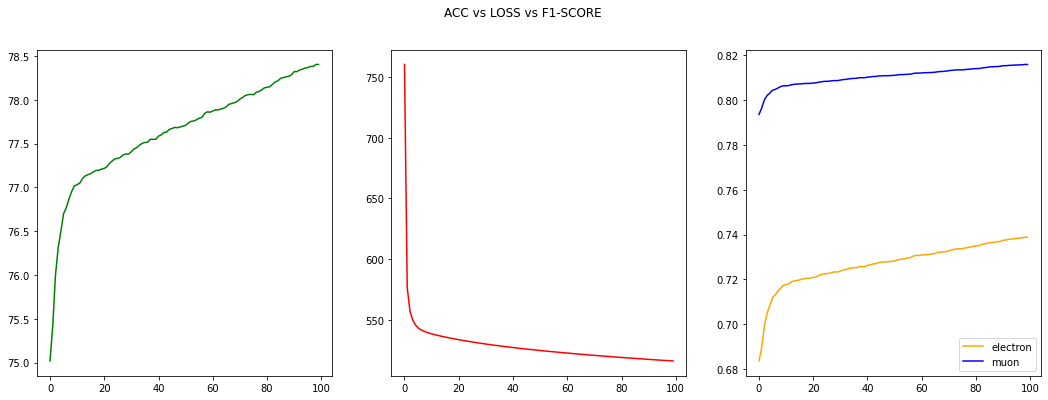

In [ ]:
xx = np.arange(epochs)
acc = torch.Tensor(ACC).detach().cpu().numpy()
lss = torch.Tensor(LOSS).detach().cpu().numpy()
f1sc = torch.Tensor(F1SC).detach().cpu().numpy()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
fig.suptitle('ACC vs LOSS vs F1-SCORE')
ax1.plot(xx, acc, c='green')
ax2.plot(xx, lss, c='red')
ax3.plot(xx, f1sc[:,0], c='orange',label="electron")
ax3.plot(xx, f1sc[:,1], c='blue',label="muon")
ax3.legend(loc='best')

In [ ]:
unique, counts = np.unique(ytr, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 25499]
 [    1 82565]]


In [ ]:
sm = KMeansSMOTE()
X_tr,Y_tr = sm.fit_resample(xtrr, ytr)

In [ ]:
input_scaler2 = StandardScaler()
X_tr = input_scaler2.fit_transform(X_tr)
xts = input_scaler2.transform(xtss)

In [ ]:
unique, counts = np.unique(Y_tr, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 82568]
 [    1 82565]]


In [ ]:
model2 = SimpleClassifier().to(device)
loss_fn2 = nn.BCELoss()
optimizer2 = torch.optim.Adam(model2.parameters())
batch_size2 = bs
epochs2 = epoch

LOSS = []
ACC = []
F1SC = []

for i in range(epochs2):
    print("--- Epoch {} ---".format(i+1))
    epoch_loss = train(model2, X_tr, Y_tr, loss_fn2, optimizer2, batch_size2)
    LOSS.append(epoch_loss)
    print("\tBCE Loss (Training) : {} ".format(epoch_loss))
    accr,f1_sc = test(model2, xts, yts)
    ACC.append(accr)
    F1SC.append(f1_sc)

--- Epoch 1 ---
	BCE Loss (Training) : 852.7813662067056 
	F-1 Score : [0.72660726 0.79505328] % 
	Test Accuracy : 76.5727310180664 % 
--- Epoch 2 ---
	BCE Loss (Training) : 663.8178927469999 
	F-1 Score : [0.74138476 0.80385261] % 
	Test Accuracy : 77.69091033935547 % 
--- Epoch 3 ---
	BCE Loss (Training) : 638.7055919123814 
	F-1 Score : [0.73995861 0.80515247] % 
	Test Accuracy : 77.72272491455078 % 
--- Epoch 4 ---
	BCE Loss (Training) : 627.298661484383 
	F-1 Score : [0.74167064 0.80585964] % 
	Test Accuracy : 77.83181762695312 % 
--- Epoch 5 ---
	BCE Loss (Training) : 624.3792339479551 
	F-1 Score : [0.74286622 0.80657879] % 
	Test Accuracy : 77.9227294921875 % 
--- Epoch 6 ---
	BCE Loss (Training) : 622.5801546629518 
	F-1 Score : [0.74350976 0.80663292] % 
	Test Accuracy : 77.94999694824219 % 
--- Epoch 7 ---
	BCE Loss (Training) : 621.3780156532302 
	F-1 Score : [0.74414672 0.80696997] % 
	Test Accuracy : 77.99545288085938 % 
--- Epoch 8 ---
	BCE Loss (Training) : 620.48299181

	BCE Loss (Training) : 600.5484429532662 
	F-1 Score : [0.75314027 0.81191687] % 
	Test Accuracy : 78.6500015258789 % 
--- Epoch 62 ---
	BCE Loss (Training) : 600.2858917536214 
	F-1 Score : [0.75307474 0.81188436] % 
	Test Accuracy : 78.64545440673828 % 
--- Epoch 63 ---
	BCE Loss (Training) : 600.0249005788937 
	F-1 Score : [0.75324539 0.81199696] % 
	Test Accuracy : 78.65908813476562 % 
--- Epoch 64 ---
	BCE Loss (Training) : 599.7657674280927 
	F-1 Score : [0.7531935  0.81202706] % 
	Test Accuracy : 78.65908813476562 % 
--- Epoch 65 ---
	BCE Loss (Training) : 599.5080907102674 
	F-1 Score : [0.7532331  0.81207463] % 
	Test Accuracy : 78.66363525390625 % 
--- Epoch 66 ---
	BCE Loss (Training) : 599.2522907033563 
	F-1 Score : [0.7532331  0.81207463] % 
	Test Accuracy : 78.66363525390625 % 
--- Epoch 67 ---
	BCE Loss (Training) : 598.9978581825271 
	F-1 Score : [0.75333824 0.8121547 ] % 
	Test Accuracy : 78.6727294921875 % 
--- Epoch 68 ---
	BCE Loss (Training) : 598.7451414894313 
	

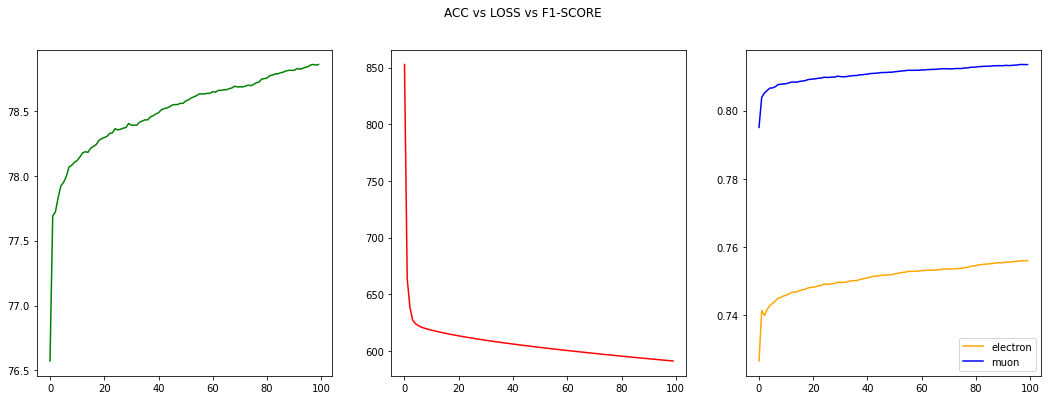

In [ ]:
xx = np.arange(epochs)
acc = torch.Tensor(ACC).detach().cpu().numpy()
lss = torch.Tensor(LOSS).detach().cpu().numpy()
f1sc = torch.Tensor(F1SC).detach().cpu().numpy()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
fig.suptitle('ACC vs LOSS vs F1-SCORE')
ax1.plot(xx, acc, c='green')
ax2.plot(xx, lss, c='red')
ax3.plot(xx, f1sc[:,0], c='orange',label="electron")
ax3.plot(xx, f1sc[:,1], c='blue',label="muon")
ax3.legend(loc='best')


# Q3. MNIST Handwritten Digit Recognition Classification

In [ ]:
mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
X_full, y_full = mnist_data['data'].to_numpy().astype(int), mnist_data['target'].to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=1)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (56000, 784)
Shape of y_train: (56000,)
Shape of X_test: (14000, 784)
Shape of y_test: (14000,)


## Define train and test functions for (a) - (d)

In [ ]:
def train_MNIST(model, x, y, loss_fn, optimizer, batch_size=128):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    y = y.type(torch.LongTensor)
    epoch_loss = 0
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        epoch_loss = epoch_loss + loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return epoch_loss

In [ ]:
def test_MNIST(model, xts, yts):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax(pred, axis=1).numpy()
        acc = np.sum(yhat==yts)*100/yhat.shape[0]
        f1_scr = f1_score(yts, yhat, average=None).reshape(-1,1)
        return acc,f1_scr

## (a) using 10 perceptrons

In [ ]:
class MNIST_PERCPT(nn.Module):
    def __init__(self):
        super().__init__()
        self.op = nn.Linear(in_features=784, out_features=10)
        self.act1 = nn.Softmax()
          
    def forward(self, x):
        x = self.op(x)
        x = self.act1(x)
        return x.squeeze()

In [ ]:
model = MNIST_PERCPT()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
batch_size = 128
epochs = 20

for i in range(epochs):
    print("--- Epoch {} ---".format(i+1))
    epoch_loss = train_MNIST(model, X_train, y_train, loss_fn, optimizer, batch_size)
    print("\tCross-Entropy Loss (Training): {} ".format(epoch_loss))

acc, f1_scr = test_MNIST(model, X_test, y_test)
print("\n")
print("Test Accuracy: {} % ".format(acc))
print("Class-wise F1 score:\n{}".format(f1_scr.reshape(-1,1)))

all_models = np.array([model, acc, f1_scr]).reshape(1,-1)

--- Epoch 1 ---
	Cross-Entropy Loss (Training): 870.8215721845627 
--- Epoch 2 ---
	Cross-Entropy Loss (Training): 834.5005272626877 
--- Epoch 3 ---
	Cross-Entropy Loss (Training): 831.9443440437317 
--- Epoch 4 ---
	Cross-Entropy Loss (Training): 830.8454670906067 
--- Epoch 5 ---
	Cross-Entropy Loss (Training): 832.9690885543823 
--- Epoch 6 ---
	Cross-Entropy Loss (Training): 829.4519348144531 
--- Epoch 7 ---
	Cross-Entropy Loss (Training): 829.6020083427429 
--- Epoch 8 ---
	Cross-Entropy Loss (Training): 828.994991183281 
--- Epoch 9 ---
	Cross-Entropy Loss (Training): 828.8871743679047 
--- Epoch 10 ---
	Cross-Entropy Loss (Training): 828.356418967247 
--- Epoch 11 ---
	Cross-Entropy Loss (Training): 828.1664642095566 
--- Epoch 12 ---
	Cross-Entropy Loss (Training): 827.227869272232 
--- Epoch 13 ---
	Cross-Entropy Loss (Training): 828.9921108484268 
--- Epoch 14 ---
	Cross-Entropy Loss (Training): 826.9949971437454 
--- Epoch 15 ---
	Cross-Entropy Loss (Training): 820.1007953

## (b) visualization of weights

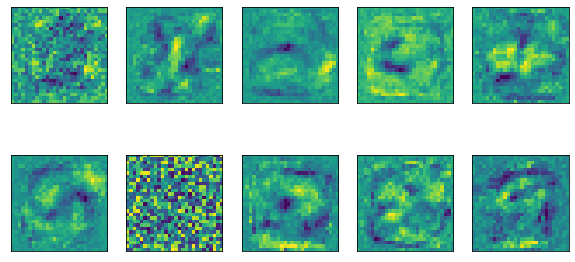

In [ ]:
wgts = model.op.state_dict()['weight'].numpy()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(wgts[i,:].reshape(28,28))
    plt.xticks([])
    plt.yticks([])

## (c) using MLP (single hidden layer)

In [ ]:
class MNIST_MLP1(nn.Module):
    def __init__(self, n_hl1):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.act1 = nn.ReLU()
        self.op = nn.Linear(in_features=n_hl1, out_features=10)
        self.act2 = nn.Softmax()
        
    def forward(self, x):
        x = self.hl1(x)
        x = self.act1(x)
        x = self.op(x)
        x = self.act2(x)
        return x.squeeze()

In [ ]:
model = MNIST_MLP1(n_hl1=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
batch_size = 128
epochs = 20

for i in range(epochs):
    print("--- Epoch {} ---".format(i+1))
    epoch_loss = train_MNIST(model, X_train, y_train, loss_fn, optimizer, batch_size)
    print("\tCross-Entropy Loss (Training): {} ".format(epoch_loss))

acc, f1_scr = test_MNIST(model, X_test, y_test)
print("\n")
print("Test Accuracy: {} % ".format(acc))
print("Class-wise F1 score:\n{}".format(f1_scr.reshape(-1,1)))

all_models = np.append(all_models, np.array([model, acc, f1_scr]).reshape(1,-1),axis=0)

--- Epoch 1 ---
	Cross-Entropy Loss (Training): 832.3887763023376 
--- Epoch 2 ---
	Cross-Entropy Loss (Training): 800.6145894527435 
--- Epoch 3 ---
	Cross-Entropy Loss (Training): 796.5329902172089 
--- Epoch 4 ---
	Cross-Entropy Loss (Training): 763.2359402179718 
--- Epoch 5 ---
	Cross-Entropy Loss (Training): 757.2175923585892 
--- Epoch 6 ---
	Cross-Entropy Loss (Training): 757.0634902715683 
--- Epoch 7 ---
	Cross-Entropy Loss (Training): 756.734099984169 
--- Epoch 8 ---
	Cross-Entropy Loss (Training): 754.8352460861206 
--- Epoch 9 ---
	Cross-Entropy Loss (Training): 753.6866776943207 
--- Epoch 10 ---
	Cross-Entropy Loss (Training): 755.0890573263168 
--- Epoch 11 ---
	Cross-Entropy Loss (Training): 754.0013757944107 
--- Epoch 12 ---
	Cross-Entropy Loss (Training): 752.5032896995544 
--- Epoch 13 ---
	Cross-Entropy Loss (Training): 753.7507690191269 
--- Epoch 14 ---
	Cross-Entropy Loss (Training): 753.5811601877213 
--- Epoch 15 ---
	Cross-Entropy Loss (Training): 754.20328

In [ ]:
model = MNIST_MLP1(n_hl1=20)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
batch_size = 128
epochs = 20

for i in range(epochs):
    print("--- Epoch {} ---".format(i+1))
    epoch_loss = train_MNIST(model, X_train, y_train, loss_fn, optimizer, batch_size)
    print("\tCross-Entropy Loss (Training): {} ".format(epoch_loss))

acc, f1_scr = test_MNIST(model, X_test, y_test)
print("\n")
print("Test Accuracy: {} % ".format(acc))
print("Class-wise F1 score:\n{}".format(f1_scr.reshape(-1,1)))

all_models = np.append(all_models, np.array([model, acc, f1_scr]).reshape(1,-1),axis=0)

--- Epoch 1 ---
	Cross-Entropy Loss (Training): 791.4798711538315 
--- Epoch 2 ---
	Cross-Entropy Loss (Training): 761.1266986131668 
--- Epoch 3 ---
	Cross-Entropy Loss (Training): 757.3964221477509 
--- Epoch 4 ---
	Cross-Entropy Loss (Training): 755.3934651613235 
--- Epoch 5 ---
	Cross-Entropy Loss (Training): 754.9444359540939 
--- Epoch 6 ---
	Cross-Entropy Loss (Training): 753.2364029884338 
--- Epoch 7 ---
	Cross-Entropy Loss (Training): 734.3146904706955 
--- Epoch 8 ---
	Cross-Entropy Loss (Training): 727.6183474063873 
--- Epoch 9 ---
	Cross-Entropy Loss (Training): 723.9083037376404 
--- Epoch 10 ---
	Cross-Entropy Loss (Training): 723.0231400728226 
--- Epoch 11 ---
	Cross-Entropy Loss (Training): 721.7129198312759 
--- Epoch 12 ---
	Cross-Entropy Loss (Training): 720.8049951791763 
--- Epoch 13 ---
	Cross-Entropy Loss (Training): 719.9400365352631 
--- Epoch 14 ---
	Cross-Entropy Loss (Training): 720.8031233549118 
--- Epoch 15 ---
	Cross-Entropy Loss (Training): 721.3352

## (d) using MLP (two hidden layers)

In [ ]:
class MNIST_MLP2(nn.Module):
    def __init__(self, n_hl1, n_hl2):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.act1 = nn.ReLU()
        self.hl2 = nn.Linear(in_features=n_hl1, out_features=n_hl2)
        self.act2 = nn.ReLU()
        self.op = nn.Linear(in_features=n_hl2, out_features=10)
        self.act3 = nn.Softmax()
        
    def forward(self, x):
        x = self.hl1(x)
        x = self.act1(x)
        x = self.hl2(x)
        x = self.act2(x)
        x = self.op(x)
        x = self.act3(x)
        return x.squeeze()

In [ ]:
model = MNIST_MLP2(n_hl1=50, n_hl2=15)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
batch_size = 128
epochs = 20

for i in range(epochs):
    print("--- Epoch {} ---".format(i+1))
    epoch_loss = train_MNIST(model, X_train, y_train, loss_fn, optimizer, batch_size)
    print("\tCross-Entropy Loss (Training): {} ".format(epoch_loss))

acc, f1_scr = test_MNIST(model, X_test, y_test)
print("\n")
print("Test Accuracy: {} % ".format(acc))
print("Class-wise F1 score:\n{}".format(f1_scr.reshape(-1,1)))

all_models = np.append(all_models, np.array([model, acc, f1_scr]).reshape(1,-1),axis=0)

--- Epoch 1 ---
	Cross-Entropy Loss (Training): 796.9110097885132 
--- Epoch 2 ---
	Cross-Entropy Loss (Training): 687.7644183635712 
--- Epoch 3 ---
	Cross-Entropy Loss (Training): 673.3869677782059 
--- Epoch 4 ---
	Cross-Entropy Loss (Training): 668.5636459589005 
--- Epoch 5 ---
	Cross-Entropy Loss (Training): 665.0298997163773 
--- Epoch 6 ---
	Cross-Entropy Loss (Training): 664.0738822221756 
--- Epoch 7 ---
	Cross-Entropy Loss (Training): 662.7776255607605 
--- Epoch 8 ---
	Cross-Entropy Loss (Training): 662.3038963079453 
--- Epoch 9 ---
	Cross-Entropy Loss (Training): 661.422306895256 
--- Epoch 10 ---
	Cross-Entropy Loss (Training): 660.2920985221863 
--- Epoch 11 ---
	Cross-Entropy Loss (Training): 660.4564979076385 
--- Epoch 12 ---
	Cross-Entropy Loss (Training): 660.4587346315384 
--- Epoch 13 ---
	Cross-Entropy Loss (Training): 660.8579840660095 
--- Epoch 14 ---
	Cross-Entropy Loss (Training): 661.2254376411438 
--- Epoch 15 ---
	Cross-Entropy Loss (Training): 661.59499

In [ ]:
model = MNIST_MLP2(n_hl1=100, n_hl2=20)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
batch_size = 128
epochs = 20

for i in range(epochs):
    print("--- Epoch {} ---".format(i+1))
    epoch_loss = train_MNIST(model, X_train, y_train, loss_fn, optimizer, batch_size)
    print("\tCross-Entropy Loss (Training): {} ".format(epoch_loss))

acc, f1_scr = test_MNIST(model, X_test, y_test)
print("\n")
print("Test Accuracy: {} % ".format(acc))
print("Class-wise F1 score:\n{}".format(f1_scr.reshape(-1,1)))

all_models = np.append(all_models, np.array([model, acc, f1_scr]).reshape(1,-1),axis=0)

--- Epoch 1 ---
	Cross-Entropy Loss (Training): 824.8926899433136 
--- Epoch 2 ---
	Cross-Entropy Loss (Training): 707.6177884340286 
--- Epoch 3 ---
	Cross-Entropy Loss (Training): 669.9658195972443 
--- Epoch 4 ---
	Cross-Entropy Loss (Training): 667.8973798751831 
--- Epoch 5 ---
	Cross-Entropy Loss (Training): 664.463975071907 
--- Epoch 6 ---
	Cross-Entropy Loss (Training): 663.539544582367 
--- Epoch 7 ---
	Cross-Entropy Loss (Training): 662.2677416801453 
--- Epoch 8 ---
	Cross-Entropy Loss (Training): 663.0276596546173 
--- Epoch 9 ---
	Cross-Entropy Loss (Training): 662.8829770088196 
--- Epoch 10 ---
	Cross-Entropy Loss (Training): 663.2113993167877 
--- Epoch 11 ---
	Cross-Entropy Loss (Training): 661.7821198701859 
--- Epoch 12 ---
	Cross-Entropy Loss (Training): 660.72187936306 
--- Epoch 13 ---
	Cross-Entropy Loss (Training): 660.4468064308167 
--- Epoch 14 ---
	Cross-Entropy Loss (Training): 658.7842222452164 
--- Epoch 15 ---
	Cross-Entropy Loss (Training): 659.91062760

## Report best model

In [ ]:
all_models.shape

(5, 3)

In [ ]:
idx = np.argmax(all_models[:,1])
print("Best model based on accuracy score is:")
print(all_models[idx,0])
print("\nAccuracy score of best model:", all_models[idx,1])
print("\nClass-wise F1 score of best model:\n", all_models[idx,2])

Best model based on accuracy score is:
MNIST_MLP2(
  (hl1): Linear(in_features=784, out_features=50, bias=True)
  (act1): ReLU()
  (hl2): Linear(in_features=50, out_features=15, bias=True)
  (act2): ReLU()
  (op): Linear(in_features=15, out_features=10, bias=True)
  (act3): Softmax(dim=None)
)

Accuracy score of best model: 95.05

Class-wise F1 score of best model:
 [[0.96485623]
 [0.98117865]
 [0.95100458]
 [0.93722628]
 [0.9511823 ]
 [0.94054469]
 [0.96088561]
 [0.95672913]
 [0.92502716]
 [0.92967033]]


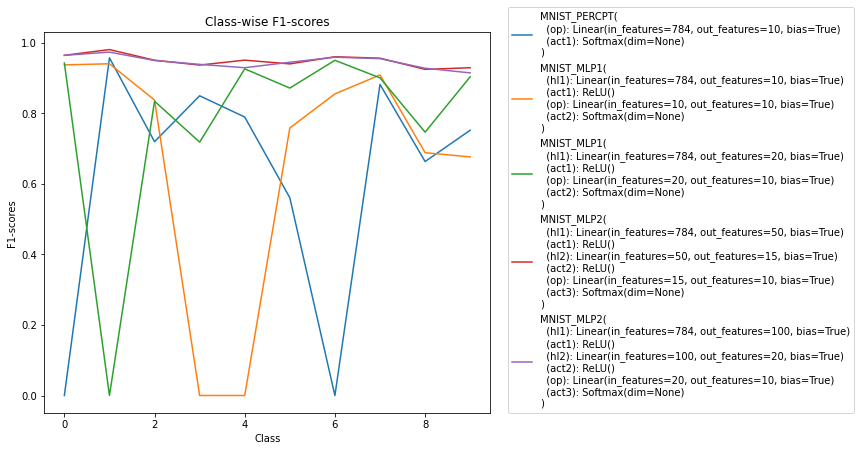

In [ ]:
plt.figure(figsize=(8,7))
for model in all_models:
    #plt.plot(range(10), model[2], label="{:.2f}%".format(model[1]))
    plt.plot(range(10), model[2], label=model[0].bfloat16())
plt.legend(loc=(1.04,0))
plt.xlabel("Class")
plt.ylabel("F1-scores")
plt.title("Class-wise F1-scores")
plt.show()

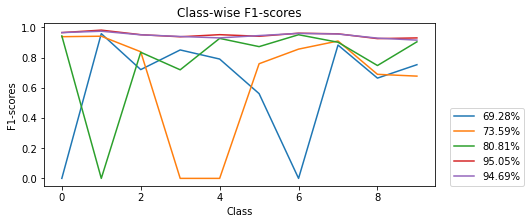

In [ ]:
plt.figure(figsize=(7,3))
for model in all_models:
    plt.plot(range(10), model[2], label="{:.2f}%".format(model[1]))
plt.legend(loc=(1.04,0))
plt.xlabel("Class")
plt.ylabel("F1-scores")
plt.title("Class-wise F1-scores")
plt.show()